In [1]:
#: Loading H2O Library

In [2]:
import h2o

In [3]:
#: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
#: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 31 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_avkashchauhan_1ocjkz
H2O cluster total nodes:,1
H2O cluster free memory:,3.313 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
#: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/regression/prostate.csv")
train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
#: Understanding Training dataset

In [10]:
train_df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [11]:
#: Training and test dataset - columns and rows details

In [12]:
print(train_df.shape)

(380, 9)


In [13]:
#: Training and Test Dataframes - columns names

In [14]:
print(train_df.col_names)

[u'ID', u'CAPSULE', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [15]:
#: Training and Test Dataframes - columns names

In [16]:
print(train_df.columns)

[u'ID', u'CAPSULE', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [17]:
#: Training and Test dataframes - columns by their type i.e. numeric, string, categorical(enum)

In [18]:
print(train_df.columns_by_type())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [19]:
#: Training and Test dataframes - columns type as strings

In [20]:
print(train_df.columns_by_type("string"))

[]


In [21]:
#: Training and Test dataframes - columns type as numeric

In [22]:
print(train_df.columns_by_type("numeric"))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [23]:
#: Training and Test dataframes - columns type as categorical or enum

In [24]:
print(train_df.columns_by_type("categorical"))

[]


In [25]:
#: Settings response or target variable for supervised machine learning

In [26]:
response = "CAPSULE"
features = train_df.col_names
print(features)

[u'ID', u'CAPSULE', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [27]:
#: Creating a list of all features we will use for machine learning

In [28]:
features.remove(response)
print(features)

[u'ID', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [29]:
#: Understanding response variable values as historgram in Training data

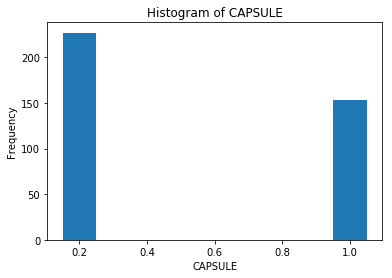

In [30]:
train_df[response].hist()

In [31]:
#: Understanding response variable values 

In [32]:
train_df[response].levels()

[]

In [33]:
train_df[response].asfactor().levels()

[['0', '1']]

In [34]:
#: Understanding response column as dataframe

In [35]:
type(train_df[response])

h2o.frame.H2OFrame

In [36]:
#: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [37]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [38]:
#: Building linear regression model (GLM) only with training dataframe

In [39]:
glm_model_with_training_only = H2OGeneralizedLinearEstimator(family = "Binomial")
glm_model_with_training_only.train(x= features, y = response, training_frame= train_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [40]:
glm_model_with_training_only

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1510608322538_27


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.165329175291
RMSE: 0.40660690512
LogLoss: 0.495921946388
Null degrees of freedom: 379
Residual degrees of freedom: 371
Null deviance: 512.288840185
Residual deviance: 376.900679255
AIC: 394.900679255
AUC: 0.827387636406
Gini: 0.654775272811
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.273868116441: 


,0,1,Error,Rate
0,142.0,85.0,0.3744,(85.0/227.0)
1,18.0,135.0,0.1176,(18.0/153.0)
Total,160.0,220.0,0.2711,(103.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2738681,0.7238606,219.0
max f2,0.1476253,0.8187773,303.0
max f0point5,0.5807376,0.7142857,99.0
max accuracy,0.4560958,0.7631579,148.0
max precision,0.9986394,1.0,0.0
max recall,0.0623959,1.0,357.0
max specificity,0.9986394,1.0,0.0
max absolute_mcc,0.4560958,0.5056595,148.0
max min_per_class_accuracy,0.3817675,0.7450980,170.0
max mean_per_class_accuracy,0.2738681,0.7539518,219.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9867979,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9767913,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9666501,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9570197,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9399771,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.8274993,1.8300654,2.1568627,0.7368421,0.8684211,0.0915033,0.2156863,83.0065359,115.6862745
,7,0.15,0.7649272,1.9607843,2.0915033,0.7894737,0.8421053,0.0980392,0.3137255,96.0784314,109.1503268
,8,0.2,0.6596141,1.8300654,2.0261438,0.7368421,0.8157895,0.0915033,0.4052288,83.0065359,102.6143791
,9,0.3,0.5523884,1.5032680,1.8518519,0.6052632,0.7456140,0.1503268,0.5555556,50.3267974,85.1851852
,10,0.4,0.4390252,1.3725490,1.7320261,0.5526316,0.6973684,0.1372549,0.6928105,37.2549020,73.2026144



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 14:57:18,0.000 sec,0,256.1444201,0.6740643
,2017-11-13 14:57:18,0.002 sec,1,194.8874941,0.5133770
,2017-11-13 14:57:18,0.002 sec,2,188.7807393,0.4975772
,2017-11-13 14:57:18,0.003 sec,3,188.4538605,0.4968035
,2017-11-13 14:57:18,0.003 sec,4,188.4503396,0.4968002


In [41]:
#: Building linear regression model (GLM) with cross validation

In [42]:
glm_model_with_training_and_cv = H2OGeneralizedLinearEstimator(nfolds=5, family = "Binomial")
glm_model_with_training_and_cv.train(x = features, y = response, training_frame=train_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
glm_model_with_training_and_cv

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1510608322538_29


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.165329175291
RMSE: 0.40660690512
LogLoss: 0.495921946388
Null degrees of freedom: 379
Residual degrees of freedom: 371
Null deviance: 512.288840185
Residual deviance: 376.900679255
AIC: 394.900679255
AUC: 0.827387636406
Gini: 0.654775272811
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.273868116441: 


,0,1,Error,Rate
0,142.0,85.0,0.3744,(85.0/227.0)
1,18.0,135.0,0.1176,(18.0/153.0)
Total,160.0,220.0,0.2711,(103.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2738681,0.7238606,219.0
max f2,0.1476253,0.8187773,303.0
max f0point5,0.5807376,0.7142857,99.0
max accuracy,0.4560958,0.7631579,148.0
max precision,0.9986394,1.0,0.0
max recall,0.0623959,1.0,357.0
max specificity,0.9986394,1.0,0.0
max absolute_mcc,0.4560958,0.5056595,148.0
max min_per_class_accuracy,0.3817675,0.7450980,170.0
max mean_per_class_accuracy,0.2738681,0.7539518,219.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9867979,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9767913,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9666501,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9570197,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9399771,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.8274993,1.8300654,2.1568627,0.7368421,0.8684211,0.0915033,0.2156863,83.0065359,115.6862745
,7,0.15,0.7649272,1.9607843,2.0915033,0.7894737,0.8421053,0.0980392,0.3137255,96.0784314,109.1503268
,8,0.2,0.6596141,1.8300654,2.0261438,0.7368421,0.8157895,0.0915033,0.4052288,83.0065359,102.6143791
,9,0.3,0.5523884,1.5032680,1.8518519,0.6052632,0.7456140,0.1503268,0.5555556,50.3267974,85.1851852
,10,0.4,0.4390252,1.3725490,1.7320261,0.5526316,0.6973684,0.1372549,0.6928105,37.2549020,73.2026144




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.17412567208
RMSE: 0.417283682979
LogLoss: 0.518955909059
Null degrees of freedom: 379
Residual degrees of freedom: 371
Null deviance: 512.574969489
Residual deviance: 394.406490885
AIC: 412.406490885
AUC: 0.811090956206
Gini: 0.622181912413
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.299295757748: 


,0,1,Error,Rate
0,151.0,76.0,0.3348,(76.0/227.0)
1,30.0,123.0,0.1961,(30.0/153.0)
Total,181.0,199.0,0.2789,(106.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2992958,0.6988636,198.0
max f2,0.1493041,0.8159912,300.0
max f0point5,0.6491633,0.6907216,82.0
max accuracy,0.4457072,0.75,149.0
max precision,0.9990694,1.0,0.0
max recall,0.0642455,1.0,353.0
max specificity,0.9990694,1.0,0.0
max absolute_mcc,0.4077889,0.4797108,160.0
max min_per_class_accuracy,0.3685410,0.7312775,172.0
max mean_per_class_accuracy,0.4077889,0.7416717,160.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9867909,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9783230,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9725397,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9473972,1.8627451,2.3284314,0.75,0.9375,0.0196078,0.0980392,86.2745098,132.8431373
,5,0.05,0.9424469,2.4836601,2.3529412,1.0,0.9473684,0.0196078,0.1176471,148.3660131,135.2941176
,6,0.1,0.8422299,1.8300654,2.0915033,0.7368421,0.8421053,0.0915033,0.2091503,83.0065359,109.1503268
,7,0.15,0.7610756,1.8300654,2.0043573,0.7368421,0.8070175,0.0915033,0.3006536,83.0065359,100.4357298
,8,0.2,0.6714147,1.8300654,1.9607843,0.7368421,0.7894737,0.0915033,0.3921569,83.0065359,96.0784314
,9,0.3,0.5394356,1.4379085,1.7864924,0.5789474,0.7192982,0.1437908,0.5359477,43.7908497,78.6492375
,10,0.4,0.4329919,1.4379085,1.6993464,0.5789474,0.6842105,0.1437908,0.6797386,43.7908497,69.9346405



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.741648,0.0504372,0.8289474,0.7628866,0.6315789,0.7936508,0.6911765
auc,0.8102137,0.0204309,0.8473011,0.8134394,0.7840909,0.8347826,0.7714544
err,0.2583519,0.0504372,0.1710526,0.2371134,0.3684211,0.2063492,0.3088235
err_count,19.6,4.1376324,13.0,23.0,28.0,13.0,21.0
f0point5,0.6842991,0.0553671,0.8108108,0.6976744,0.5882353,0.7086614,0.6161137
---,---,---,---,---,---,---,---
r2,0.2735834,0.0420356,0.3592168,0.2781078,0.2491044,0.3022268,0.1792613
recall,0.8529605,0.0750214,0.75,0.7692308,1.0,0.7826087,0.962963
residual_deviance,78.8813,8.995062,73.16009,100.2491,80.50242,61.080074,79.41481
rmse,0.4170183,0.0122546,0.3952240,0.4165918,0.4278362,0.4021708,0.443269



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 14:57:18,0.000 sec,0,256.1444201,0.6740643
,2017-11-13 14:57:18,0.002 sec,1,194.8874941,0.5133770
,2017-11-13 14:57:18,0.002 sec,2,188.7807393,0.4975772
,2017-11-13 14:57:18,0.003 sec,3,188.4538605,0.4968035
,2017-11-13 14:57:18,0.003 sec,4,188.4503396,0.4968002


In [44]:
#: Building linear regression model (GLM) with training and 
#  validation data and for that reason we need to split training dataset

In [45]:
df_prostate_train, df_prostate_valid, df_prostate_test = train_df.split_frame(ratios=[0.8,0.1])

In [46]:
#: understanding the row count into original andsplit object

In [47]:
print(train_df.shape)
print(df_prostate_train.shape)
print(df_prostate_valid.shape)
print(df_prostate_test.shape)

(380, 9)
(300, 9)
(41, 9)
(39, 9)


In [48]:
#: Building linear regression model (GLM) with training and validation data now

In [49]:
glm_model_with_training_and_validtion = H2OGeneralizedLinearEstimator(family = "Binomial")
glm_model_with_training_and_validtion.train(x = features, y = response, 
                                            training_frame=df_prostate_train, 
                                            validation_frame=df_prostate_valid,
                                           model_id = "glm_model_with_training_and_validtion_python")

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [50]:
glm_model_with_training_and_validtion

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_model_with_training_and_validtion_python


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.172881414421
RMSE: 0.415790108614
LogLoss: 0.514938620857
Null degrees of freedom: 299
Residual degrees of freedom: 291
Null deviance: 405.373405975
Residual deviance: 308.963172514
AIC: 326.963172514
AUC: 0.814975133542
Gini: 0.629950267084
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.287833399151: 


,0,1,Error,Rate
0,111.0,67.0,0.3764,(67.0/178.0)
1,15.0,107.0,0.123,(15.0/122.0)
Total,126.0,174.0,0.2733,(82.0/300.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2878334,0.7229730,173.0
max f2,0.1552152,0.8196721,243.0
max f0point5,0.4231571,0.7073955,124.0
max accuracy,0.4231571,0.7633333,124.0
max precision,0.9966497,1.0,0.0
max recall,0.0711054,1.0,283.0
max specificity,0.9966497,1.0,0.0
max absolute_mcc,0.4231571,0.5115769,124.0
max min_per_class_accuracy,0.4182599,0.7295082,127.0
max mean_per_class_accuracy,0.4231571,0.7567232,124.0


Gains/Lift Table: Avg response rate: 40.67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.9788795,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0245902,145.9016393,145.9016393
,2,0.02,0.9723558,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0491803,145.9016393,145.9016393
,3,0.03,0.9603805,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0737705,145.9016393,145.9016393
,4,0.04,0.9468066,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0983607,145.9016393,145.9016393
,5,0.05,0.9251554,2.4590164,2.4590164,1.0,1.0,0.0245902,0.1229508,145.9016393,145.9016393
,6,0.1,0.8207720,1.6393443,2.0491803,0.6666667,0.8333333,0.0819672,0.2049180,63.9344262,104.9180328
,7,0.15,0.7335702,1.9672131,2.0218579,0.8,0.8222222,0.0983607,0.3032787,96.7213115,102.1857923
,8,0.2,0.6510465,1.6393443,1.9262295,0.6666667,0.7833333,0.0819672,0.3852459,63.9344262,92.6229508
,9,0.3,0.5325099,1.3934426,1.7486339,0.5666667,0.7111111,0.1393443,0.5245902,39.3442623,74.8633880
,10,0.4,0.4456888,1.7213115,1.7418033,0.7,0.7083333,0.1721311,0.6967213,72.1311475,74.1803279




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.156113826234
RMSE: 0.395112422272
LogLoss: 0.473325434714
Null degrees of freedom: 40
Residual degrees of freedom: 32
Null deviance: 54.1367869646
Residual deviance: 38.8126856465
AIC: 56.8126856465
AUC: 0.848717948718
Gini: 0.697435897436
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.474497214428: 


,0,1,Error,Rate
0,24.0,2.0,0.0769,(2.0/26.0)
1,5.0,10.0,0.3333,(5.0/15.0)
Total,29.0,12.0,0.1707,(7.0/41.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4744972,0.7407407,11.0
max f2,0.1889904,0.8241758,30.0
max f0point5,0.4744972,0.7936508,11.0
max accuracy,0.4744972,0.8292683,11.0
max precision,0.9581874,1.0,0.0
max recall,0.1889904,1.0,30.0
max specificity,0.9581874,1.0,0.0
max absolute_mcc,0.4744972,0.6243181,11.0
max min_per_class_accuracy,0.3637427,0.7692308,17.0
max mean_per_class_accuracy,0.4744972,0.7948718,11.0


Gains/Lift Table: Avg response rate: 36.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0243902,0.8826142,2.7333333,2.7333333,1.0,1.0,0.0666667,0.0666667,173.3333333,173.3333333
,2,0.0243902,0.8070411,0.0,2.7333333,0.0,1.0,0.0,0.0666667,-100.0,173.3333333
,3,0.0487805,0.7662521,2.7333333,2.7333333,1.0,1.0,0.0666667,0.1333333,173.3333333,173.3333333
,4,0.0487805,0.7602473,0.0,2.7333333,0.0,1.0,0.0,0.1333333,-100.0,173.3333333
,5,0.0731707,0.7542425,2.7333333,2.7333333,1.0,1.0,0.0666667,0.2,173.3333333,173.3333333
,6,0.1219512,0.5871963,1.3666667,2.1866667,0.5,0.8,0.0666667,0.2666667,36.6666667,118.6666667
,7,0.1707317,0.5747403,2.7333333,2.3428571,1.0,0.8571429,0.1333333,0.4,173.3333333,134.2857143
,8,0.2195122,0.5263861,1.3666667,2.1259259,0.5,0.7777778,0.0666667,0.4666667,36.6666667,112.5925926
,9,0.3170732,0.4229667,2.05,2.1025641,0.75,0.7692308,0.2,0.6666667,105.0,110.2564103
,10,0.4146341,0.3868156,0.6833333,1.7686275,0.25,0.6470588,0.0666667,0.7333333,-31.6666667,76.8627451



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 14:57:20,0.000 sec,0,202.6867030,0.6756223
,2017-11-13 14:57:20,0.001 sec,1,158.2317004,0.5279166
,2017-11-13 14:57:20,0.001 sec,2,154.6406547,0.5161740
,2017-11-13 14:57:20,0.001 sec,3,154.4829029,0.5157101
,2017-11-13 14:57:20,0.002 sec,4,154.4815863,0.5157088


In [51]:
#: Performing predictions with one of the above model

In [52]:
glm_predictions = glm_model_with_training_and_validtion.predict(df_prostate_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [53]:
glm_predictions

predict,p0,p1
1,0.0268861,0.973114
1,0.110299,0.889701
0,0.928056,0.0719438
0,0.916158,0.0838421
0,0.967759,0.0322409
1,0.0376887,0.962311
0,0.721361,0.278639
0,0.81071,0.18929
0,0.720737,0.279263
0,0.624465,0.375535


In [54]:
#: Understanding/Validating predictions based on prediction results historgram

In [55]:
type(glm_predictions)

h2o.frame.H2OFrame

In [56]:
glm_predictions.hist()

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Hist only applies to single numeric columns.
  Request: POST /99/Rapids
    data: {u'session_id': '_sid_9e0f', u'ast': "(tmp= py_16_sid_9e0f (hist predictions_a907_glm_model_with_training_and_validtion_python_on_py_15_sid_9e0f 'sturges'))"}


In [ ]:
#: Understanding/Validating predictions based on prediction results historgram

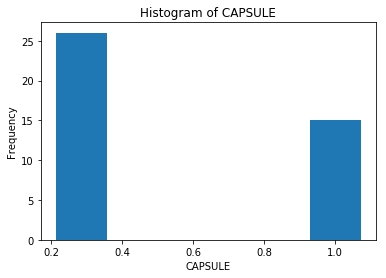

In [57]:
df_prostate_valid[response].hist()

In [58]:
#: Here we can select the best model based on accuracy among all of above models we have created

In [59]:
glm_model_with_training_and_cv.model_performance(train=True)


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.165329175291
RMSE: 0.40660690512
LogLoss: 0.495921946388
Null degrees of freedom: 379
Residual degrees of freedom: 371
Null deviance: 512.288840185
Residual deviance: 376.900679255
AIC: 394.900679255
AUC: 0.827387636406
Gini: 0.654775272811
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.273868116441: 


,0,1,Error,Rate
0,142.0,85.0,0.3744,(85.0/227.0)
1,18.0,135.0,0.1176,(18.0/153.0)
Total,160.0,220.0,0.2711,(103.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2738681,0.7238606,219.0
max f2,0.1476253,0.8187773,303.0
max f0point5,0.5807376,0.7142857,99.0
max accuracy,0.4560958,0.7631579,148.0
max precision,0.9986394,1.0,0.0
max recall,0.0623959,1.0,357.0
max specificity,0.9986394,1.0,0.0
max absolute_mcc,0.4560958,0.5056595,148.0
max min_per_class_accuracy,0.3817675,0.7450980,170.0
max mean_per_class_accuracy,0.2738681,0.7539518,219.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9867979,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9767913,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9666501,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9570197,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9399771,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.8274993,1.8300654,2.1568627,0.7368421,0.8684211,0.0915033,0.2156863,83.0065359,115.6862745
,7,0.15,0.7649272,1.9607843,2.0915033,0.7894737,0.8421053,0.0980392,0.3137255,96.0784314,109.1503268
,8,0.2,0.6596141,1.8300654,2.0261438,0.7368421,0.8157895,0.0915033,0.4052288,83.0065359,102.6143791
,9,0.3,0.5523884,1.5032680,1.8518519,0.6052632,0.7456140,0.1503268,0.5555556,50.3267974,85.1851852
,10,0.4,0.4390252,1.3725490,1.7320261,0.5526316,0.6973684,0.1372549,0.6928105,37.2549020,73.2026144


In [60]:
#: Here we can select the best model based on accuracy among all of above models we have created 
#: R^2 Error

In [61]:
glm_model_with_training_and_cv.model_performance(train=True).r2()

0.31261602280248935

In [62]:
#: RMSE (Root Mean Square) Error

In [63]:
print(glm_model_with_training_and_cv.model_performance(train=True).rmse())
print(glm_model_with_training_and_cv.model_performance(xval=True).rmse())

0.40660690512
0.417283682979


In [64]:
#: R^2 (R^2) Error

In [65]:
print(glm_model_with_training_and_validtion.model_performance(train=True).r2())
print(glm_model_with_training_and_validtion.model_performance(valid=True).r2())

0.283508597444
0.327109379747


In [66]:
#: Getting model ID from an H2O Model

In [67]:
print(glm_model_with_training_and_cv.model_id)
print(glm_model_with_training_and_validtion.model_id)

GLM_model_python_1510608322538_29
glm_model_with_training_and_validtion_python


In [68]:
#: Because we have built the GLM mode, getting coefficients from the model

In [69]:
## Coefiecients
glm_model_with_training_and_cv.coef()

{u'AGE': -0.007959389969014725,
 u'DCAPS': 0.5422518782813839,
 u'DPROS': 0.5503891749841721,
 u'GLEASON': 1.0053229809192141,
 u'ID': 0.001584456980571878,
 u'Intercept': -8.102861233026575,
 u'PSA': 0.027076170422619898,
 u'RACE': -0.606018934540387,
 u'VOL': -0.011441518403143272}

In [70]:
#: Because we have built the GLM mode, getting coefficients from the model

In [71]:
# Normalized Coefiecients ? 
# multinomial? Shoule be used for logistics regression? 
glm_model_with_training_and_cv.coef_norm()

{u'AGE': -0.05195150558690226,
 u'DCAPS': 0.16845404316107315,
 u'DPROS': 0.5504484068491214,
 u'GLEASON': 1.097765821402851,
 u'ID': 0.1740380126133622,
 u'Intercept': -0.4801057465314765,
 u'PSA': 0.5414576856126687,
 u'RACE': -0.18712244084304375,
 u'VOL': -0.2099246315094121}

In [72]:
#: Getting cross validation prediction details from the model with cross-validation 
#: (If cross validation prediction save is not set to TRUE, you will get error message)

In [73]:
glm_model_with_training_and_cv.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.741648,0.0504372,0.8289474,0.7628866,0.6315789,0.7936508,0.6911765
auc,0.8102137,0.0204309,0.8473011,0.8134394,0.7840909,0.8347826,0.7714544
err,0.2583519,0.0504372,0.1710526,0.2371134,0.3684211,0.2063492,0.3088235
err_count,19.6,4.1376324,13.0,23.0,28.0,13.0,21.0
f0point5,0.6842991,0.0553671,0.8108108,0.6976744,0.5882353,0.7086614,0.6161137
---,---,---,---,---,---,---,---
r2,0.2735834,0.0420356,0.3592168,0.2781078,0.2491044,0.3022268,0.1792613
recall,0.8529605,0.0750214,0.75,0.7692308,1.0,0.7826087,0.962963
residual_deviance,78.8813,8.995062,73.16009,100.2491,80.50242,61.080074,79.41481
rmse,0.4170183,0.0122546,0.3952240,0.4165918,0.4278362,0.4021708,0.443269



See the whole table with table.as_data_frame()


In [74]:
#: Getting variable importance from a GLM mode (It will plot the coefficient table)

In [75]:
glm_model_with_training_and_validtion.varimp()

In [76]:
#: Getting variable importance PLOT for GLM (Error)

In [77]:
# - Positive ?
# - Negative ?
glm_model_with_training_and_validtion.variable_importancesvarimp_plot()

AttributeError: type object 'H2OGeneralizedLinearEstimator' has no attribute 'variable_importancesvarimp_plot'

In [78]:
#: Building a GLM model with cross validation and saving cross validation predictions

In [79]:
glm_model_with_training_and_cv = H2OGeneralizedLinearEstimator(keep_cross_validation_predictions = True, nfolds=5)
glm_model_with_training_and_cv.train(x = features, y = response, training_frame= df_prostate_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [80]:
#: Looking at cross validation predictions for all CV models

In [81]:
len(glm_model_with_training_and_cv.cross_validation_predictions())

5

In [82]:
glm_model_with_training_and_cv.cross_validation_predictions()[0]
glm_model_with_training_and_cv.cross_validation_predictions()[1]

predict
0.283107
0
0
0
0
0
0
0
0
0


In [83]:
#: Accessing H2O Model details from JSON

In [84]:
glm_model_with_training_and_validtion._model_json

Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,-7.7385145,-0.4394848
ID,0.0008976,0.1009232
AGE,-0.0045180,-0.0302450
RACE,-0.5926484,-0.1843044
DPROS,0.4063556,0.4003219
DCAPS,0.6955968,0.2120891
PSA,0.0241052,0.5234431
VOL,-0.0125058,-0.2207843
GLEASON,0.9633195,1.0153889


GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.414E-4 )",8,8,4,py_13_sid_9e0f


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 14:57:20,0.000 sec,0,202.6867030,0.6756223
,2017-11-13 14:57:20,0.001 sec,1,158.2317004,0.5279166
,2017-11-13 14:57:20,0.001 sec,2,154.6406547,0.5161740
,2017-11-13 14:57:20,0.001 sec,3,154.4829029,0.5157101
,2017-11-13 14:57:20,0.002 sec,4,154.4815863,0.5157088


Standardized Coefficient Magnitudes: standardized coefficient magnitudes



names,coefficients,sign
GLEASON,1.0153889,POS
PSA,0.5234431,POS
DPROS,0.4003219,POS
VOL,0.2207843,NEG
DCAPS,0.2120891,POS
RACE,0.1843044,NEG
ID,0.1009232,POS
AGE,0.0302450,NEG
,,None



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.172881414421
RMSE: 0.415790108614
LogLoss: 0.514938620857
Null degrees of freedom: 299
Residual degrees of freedom: 291
Null deviance: 405.373405975
Residual deviance: 308.963172514
AIC: 326.963172514
AUC: 0.814975133542
Gini: 0.629950267084
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.287833399151: 


,0,1,Error,Rate
0,111.0,67.0,0.3764,(67.0/178.0)
1,15.0,107.0,0.123,(15.0/122.0)
Total,126.0,174.0,0.2733,(82.0/300.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2878334,0.7229730,173.0
max f2,0.1552152,0.8196721,243.0
max f0point5,0.4231571,0.7073955,124.0
max accuracy,0.4231571,0.7633333,124.0
max precision,0.9966497,1.0,0.0
max recall,0.0711054,1.0,283.0
max specificity,0.9966497,1.0,0.0
max absolute_mcc,0.4231571,0.5115769,124.0
max min_per_class_accuracy,0.4182599,0.7295082,127.0
max mean_per_class_accuracy,0.4231571,0.7567232,124.0


Gains/Lift Table: Avg response rate: 40.67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.9788795,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0245902,145.9016393,145.9016393
,2,0.02,0.9723558,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0491803,145.9016393,145.9016393
,3,0.03,0.9603805,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0737705,145.9016393,145.9016393
,4,0.04,0.9468066,2.4590164,2.4590164,1.0,1.0,0.0245902,0.0983607,145.9016393,145.9016393
,5,0.05,0.9251554,2.4590164,2.4590164,1.0,1.0,0.0245902,0.1229508,145.9016393,145.9016393
,6,0.1,0.8207720,1.6393443,2.0491803,0.6666667,0.8333333,0.0819672,0.2049180,63.9344262,104.9180328
,7,0.15,0.7335702,1.9672131,2.0218579,0.8,0.8222222,0.0983607,0.3032787,96.7213115,102.1857923
,8,0.2,0.6510465,1.6393443,1.9262295,0.6666667,0.7833333,0.0819672,0.3852459,63.9344262,92.6229508
,9,0.3,0.5325099,1.3934426,1.7486339,0.5666667,0.7111111,0.1393443,0.5245902,39.3442623,74.8633880
,10,0.4,0.4456888,1.7213115,1.7418033,0.7,0.7083333,0.1721311,0.6967213,72.1311475,74.1803279




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.156113826234
RMSE: 0.395112422272
LogLoss: 0.473325434714
Null degrees of freedom: 40
Residual degrees of freedom: 32
Null deviance: 54.1367869646
Residual deviance: 38.8126856465
AIC: 56.8126856465
AUC: 0.848717948718
Gini: 0.697435897436
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.474497214428: 


,0,1,Error,Rate
0,24.0,2.0,0.0769,(2.0/26.0)
1,5.0,10.0,0.3333,(5.0/15.0)
Total,29.0,12.0,0.1707,(7.0/41.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4744972,0.7407407,11.0
max f2,0.1889904,0.8241758,30.0
max f0point5,0.4744972,0.7936508,11.0
max accuracy,0.4744972,0.8292683,11.0
max precision,0.9581874,1.0,0.0
max recall,0.1889904,1.0,30.0
max specificity,0.9581874,1.0,0.0
max absolute_mcc,0.4744972,0.6243181,11.0
max min_per_class_accuracy,0.3637427,0.7692308,17.0
max mean_per_class_accuracy,0.4744972,0.7948718,11.0


Gains/Lift Table: Avg response rate: 36.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0243902,0.8826142,2.7333333,2.7333333,1.0,1.0,0.0666667,0.0666667,173.3333333,173.3333333
,2,0.0243902,0.8070411,0.0,2.7333333,0.0,1.0,0.0,0.0666667,-100.0,173.3333333
,3,0.0487805,0.7662521,2.7333333,2.7333333,1.0,1.0,0.0666667,0.1333333,173.3333333,173.3333333
,4,0.0487805,0.7602473,0.0,2.7333333,0.0,1.0,0.0,0.1333333,-100.0,173.3333333
,5,0.0731707,0.7542425,2.7333333,2.7333333,1.0,1.0,0.0666667,0.2,173.3333333,173.3333333
,6,0.1219512,0.5871963,1.3666667,2.1866667,0.5,0.8,0.0666667,0.2666667,36.6666667,118.6666667
,7,0.1707317,0.5747403,2.7333333,2.3428571,1.0,0.8571429,0.1333333,0.4,173.3333333,134.2857143
,8,0.2195122,0.5263861,1.3666667,2.1259259,0.5,0.7777778,0.0666667,0.4666667,36.6666667,112.5925926
,9,0.3170732,0.4229667,2.05,2.1025641,0.75,0.7692308,0.2,0.6666667,105.0,110.2564103
,10,0.4146341,0.3868156,0.6833333,1.7686275,0.25,0.6470588,0.0666667,0.7333333,-31.6666667,76.8627451


{u'__meta': {u'schema_name': u'GLMModelV3',
  u'schema_type': u'GLMModel',
  u'schema_version': 3},
 u'algo': u'glm',
 u'algo_full_name': u'Generalized Linear Modeling',
 u'compatible_frames': None,
 u'data_frame': {u'URL': u'/3/Frames/py_13_sid_9e0f',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'py_13_sid_9e0f',
  u'type': u'Key<Frame>'},
 u'model_id': {u'URL': u'/3/Models/glm_model_with_training_and_validtion_python',
  u'__meta': {u'schema_name': u'ModelKeyV3',
   u'schema_type': u'Key<Model>',
   u'schema_version': 3},
  u'name': u'glm_model_with_training_and_validtion_python',
  u'type': u'Key<Model>'},
 u'output': {u'__meta': {u'schema_name': u'GLMModelOutputV3',
   u'schema_type': u'GLMOutput',
   u'schema_version': 3},
  u'coefficients_table': ,
  u'cross_validation_fold_assignment_frame_id': None,
  u'cross_validation_holdout_predictions_frame_id': None,
  u'cross_validation_metrics': None,
  u'cross_vali

In [85]:
glm_model_with_training_and_validtion._model_json['output']['coefficients_table']

Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,-7.7385145,-0.4394848
ID,0.0008976,0.1009232
AGE,-0.0045180,-0.0302450
RACE,-0.5926484,-0.1843044
DPROS,0.4063556,0.4003219
DCAPS,0.6955968,0.2120891
PSA,0.0241052,0.5234431
VOL,-0.0125058,-0.2207843
GLEASON,0.9633195,1.0153889


In [86]:
glm_model_with_training_and_validtion._model_json['output']['names']

[u'ID',
 u'AGE',
 u'RACE',
 u'DPROS',
 u'DCAPS',
 u'PSA',
 u'VOL',
 u'GLEASON',
 u'CAPSULE']

In [87]:
glm_model_with_training_and_validtion._model_json['output']['cross_validation_predictions']

In [88]:
glm_model_with_training_and_cv._model_json['output']['cross_validation_predictions']

[{u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_50_cv_1',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GLM_model_python_1510608322538_50_cv_1',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_50_cv_2',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GLM_model_python_1510608322538_50_cv_2',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_50_cv_3',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GLM_model_python_1510608322538_50_cv_3',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_50_cv_4',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name

In [89]:
glm_model_with_training_and_cv._model_json['output']['training_metrics']


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.176689176272
RMSE: 0.420344116495
MAE: 0.367177961951
RMSLE: 0.300945053922
R^2: 0.267727672477
Mean Residual Deviance: 0.176689176272
Null degrees of freedom: 299
Residual degrees of freedom: 291
Null deviance: 72.3866666667
Residual deviance: 53.0067528816
AIC: 351.354173015


In [90]:
glm_model_with_training_and_cv._model_json['output']['training_metrics']['MSE']

0.17668917627209857

In [91]:
glm_model_with_training_and_cv._model_json['output']['training_metrics']['R^2']